In [59]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [41]:
#x  = '../Image_Classification/seg_train/seg_train'
#path = Path(x)
#path.ls()
#path = Path(r'C:\Users\ASUS\Downloads\Pelatihan FGA 2024\Image_Classification\seg_train\seg_train')
train_path = Path('C:/Users/ASUS/Downloads/Pelatihan FGA 2024/Image_Classification/seg_train/seg_train')
test_path = Path('C:/Users/ASUS/Downloads/Pelatihan FGA 2024/Image_Classification/seg_test/seg_test')

Number of training samples: 11228
Number of validation samples: 2806
Number of test samples: 3000


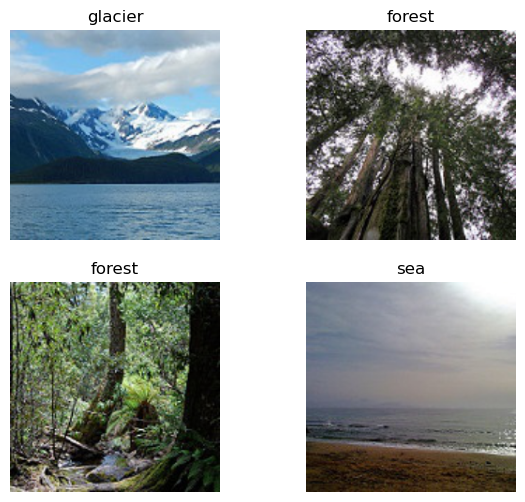

In [47]:
#dblock = DataBlock(
#    blocks=(ImageBlock, CategoryBlock),
#   get_items=get_image_files,
#    item_tfms=Resize(224),
#    batch_tfms=Normalize.from_stats(*imagenet_stats)
#)


#dls = dblock.dataloaders(path, bs=64) 

#print("Number of training samples:", len(dls.train.dataset))
#print("Number of validation samples:", len(dls.valid.dataset))


#dls.show_batch(max_n=4, figsize=(7, 6))
def parent_label(o):
    return o.parent.name
    
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,  # Extract the label from the parent folder
    item_tfms=Resize(224),
    batch_tfms=Normalize.from_stats(*imagenet_stats)
)

# Create DataLoaders for training/validation from the training dataset
dls = dblock.dataloaders(train_path, bs=64)

# Load the test dataset and create a test DataLoader
test_files = get_image_files(test_path)
test_dl = dls.test_dl(test_files)

# Print information about the datasets
print("Number of training samples:", len(dls.train.dataset))
print("Number of validation samples:", len(dls.valid.dataset))
print("Number of test samples:", len(test_dl.dataset))

# Show a batch of images from the training set
dls.show_batch(max_n=4, figsize=(7, 6))

In [49]:
#learn = vision_learner(dls, models.resnet18, metrics=[accuracy], model_dir=Path('../Image_Classification/working'))

# If `dls.c` is not set, specify `n_out` explicitly
learn = vision_learner(dls, models.resnet18, metrics=[accuracy], model_dir=Path('../Image_Classification/working'), n_out=len(dls.vocab))

# You can then proceed with training and evaluation
learn.fine_tune(1)


epoch,train_loss,valid_loss,accuracy,time
0,0.536263,0.332388,0.896650,07:09


epoch,train_loss,valid_loss,accuracy,time
0,0.276886,0.234145,0.927655,09:40


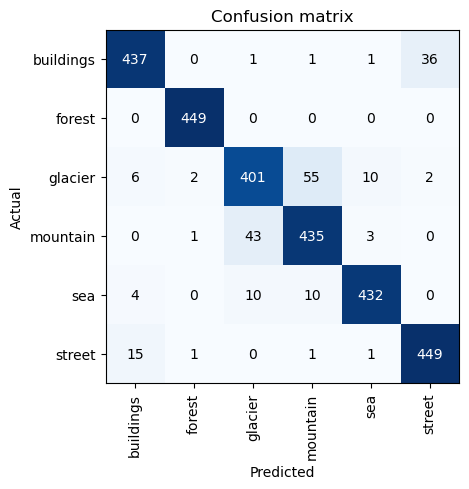

In [61]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

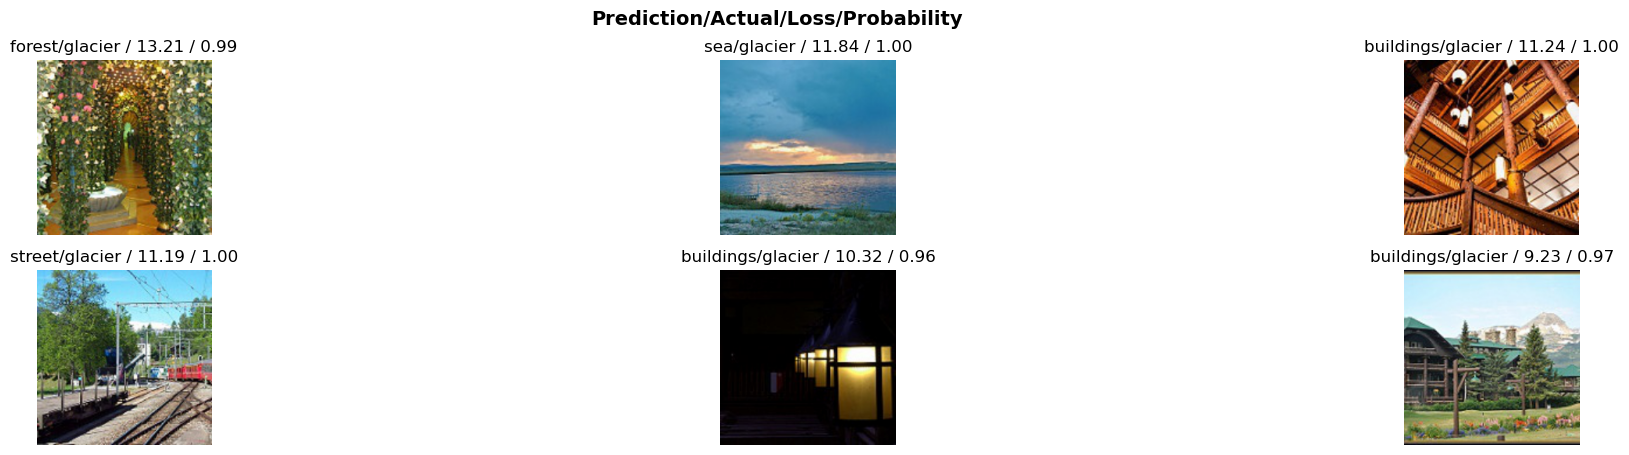

In [91]:
interp.plot_top_losses(6,figsize = (25,5))


Prediction: buildings


<Axes: >

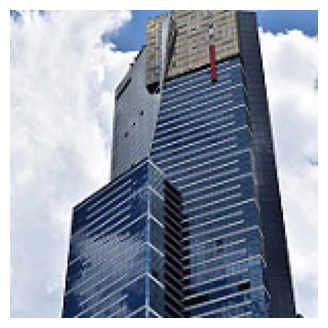

In [111]:

img_path = 'C:/Users/ASUS/Downloads/Pelatihan FGA 2024/Image_Classification/seg_test/seg_test/buildings/20057.jpg'

# Load the image
try:
    img = PILImage.create(img_path)
    # Make prediction
    pred_class, pred_idx, outputs = learn.predict(img)
    print(f'Prediction: {pred_class}')
except FileNotFoundError as e:
    print(f'Error: {e}')

img.show()

Prediction: buildings


<Axes: >

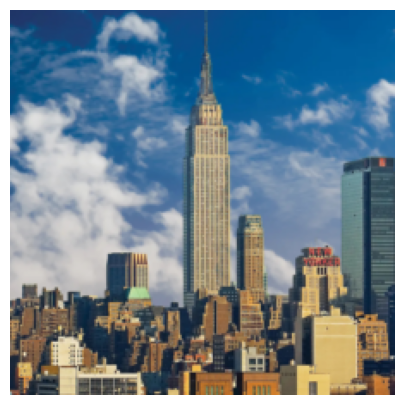

In [113]:
def preprocess_and_predict(image_path, learner):
    img = PILImage.create(image_path)   
    img = Resize(224)(img)              
    pred_class, pred_idx, outputs = learner.predict(img)  
    return pred_class, img  


image_path = 'C:/Users/ASUS/Downloads/Pelatihan FGA 2024/Image_Classification/New-York.jpg'
prediction, img = preprocess_and_predict(image_path, learn)  
print(f'Prediction: {prediction}')
img.show()  